In [93]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import pandas as pd
from tqdm import tqdm 

os.environ['SPOTIPY_CLIENT_ID'] = ''
os.environ['SPOTIPY_CLIENT_SECRET'] = ''

credentials = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=credentials)

Vamos buscar por um artista para encontrar o seu identificador. No meu caso, procurarei por Jorge Ben:

In [79]:
sp.search(q='artist:' + 'Jorge Ben', type='artist')

{'artists': {'href': 'https://api.spotify.com/v1/search?query=artist%3AJorge+Ben&type=artist&offset=0&limit=10',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5JYtpnUKxAzXfHEYpOeeit'},
    'followers': {'href': None, 'total': 901440},
    'genres': ['bossa nova',
     'manguebeat',
     'mpb',
     'samba',
     'samba-rock',
     'tropicalia'],
    'href': 'https://api.spotify.com/v1/artists/5JYtpnUKxAzXfHEYpOeeit',
    'id': '5JYtpnUKxAzXfHEYpOeeit',
    'images': [{'height': 1000,
      'url': 'https://i.scdn.co/image/a9c6a324c5f4a0f25bc711a7c4434c89c05ceba2',
      'width': 1000},
     {'height': 640,
      'url': 'https://i.scdn.co/image/7f234b1e44539a169dd9e7f1372a87616d93f7dc',
      'width': 640},
     {'height': 200,
      'url': 'https://i.scdn.co/image/8de927ae02c5ecd038c643a8b1ea8fbe63bb8c85',
      'width': 200},
     {'height': 64,
      'url': 'https://i.scdn.co/image/751ae07fb4d3f35265276c227fedd0630a47ecfa',
      'width': 64}],
    'name':

Agora que temos o identificador do artista, podemos buscar por seus álbuns. O método "artist_albums" retorna um dicionário com os álbuns do artista. Vamos ver o que temos: 

In [80]:
sp.artist_albums('5JYtpnUKxAzXfHEYpOeeit', album_type='album')

{'href': 'https://api.spotify.com/v1/artists/5JYtpnUKxAzXfHEYpOeeit/albums?include_groups=album&offset=0&limit=20',
 'items': [{'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5JYtpnUKxAzXfHEYpOeeit'},
     'href': 'https://api.spotify.com/v1/artists/5JYtpnUKxAzXfHEYpOeeit',
     'id': '5JYtpnUKxAzXfHEYpOeeit',
     'name': 'Jorge Ben Jor',
     'type': 'artist',
     'uri': 'spotify:artist:5JYtpnUKxAzXfHEYpOeeit'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES'

Diversos albuns apareceram. Vamos pegar um álbum, no meu caso, o "A Tábua de Esmeralda", e ver quais músicas ele possui, com o método "album_tracks":

In [81]:
sp.album_tracks('3xWp6y0HGsHZlXljNs7VRy')['items']

[{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5JYtpnUKxAzXfHEYpOeeit'},
    'href': 'https://api.spotify.com/v1/artists/5JYtpnUKxAzXfHEYpOeeit',
    'id': '5JYtpnUKxAzXfHEYpOeeit',
    'name': 'Jorge Ben Jor',
    'type': 'artist',
    'uri': 'spotify:artist:5JYtpnUKxAzXfHEYpOeeit'}],
  'available_markets': ['AR',
   'AU',
   'BE',
   'BG',
   'BO',
   'BR',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CW',
   'CZ',
   'DE',
   'DK',
   'DO',
   'EC',
   'EE',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HN',
   'HU',
   'IE',
   'IS',
   'IT',
   'JP',
   'KH',
   'LT',
   'LU',
   'LV',
   'MX',
   'NI',
   'NL',
   'NO',
   'NZ',
   'PA',
   'PE',
   'PK',
   'PL',
   'PT',
   'PY',
   'SA',
   'SE',
   'SG',
   'SK',
   'SV',
   'US',
   'VE',
   'VN'],
  'disc_number': 1,
  'duration_ms': 179293,
  'explicit': False,
  'external_urls': {'spotify': 'https://open.spotify.com/track/6U03Orwr5Dxt8jahLnQpYV'},
  'href': 'https://api.spotif

Podemos facilmente transformar esse dicionário em um dataframe com o método "json_normalize" do pacote "pandas":

In [82]:
pd.json_normalize(sp.album_tracks('3xWp6y0HGsHZlXljNs7VRy')['items'])

,artists,available_markets,disc_number,duration_ms,explicit,href,id,is_local,name,preview_url,track_number,type,uri,external_urls.spotify
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,179293,False,https://api.spotify.com/v1/tracks/6U03Orwr5Dxt...,6U03Orwr5Dxt8jahLnQpYV,False,"Mas, Que Nada!",None,1,track,spotify:track:6U03Orwr5Dxt8jahLnQpYV,https://open.spotify.com/track/6U03Orwr5Dxt8ja...
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,139626,False,https://api.spotify.com/v1/tracks/1jCFnbL30NwO...,1jCFnbL30NwORyVsiHX6mH,False,Tim Dom Dom,None,2,track,spotify:track:1jCFnbL30NwORyVsiHX6mH,https://open.spotify.com/track/1jCFnbL30NwORyV...
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,86760,False,https://api.spotify.com/v1/tracks/1XjFyPzU5z3z...,1XjFyPzU5z3zbYJQETYGiZ,False,Balança Pema,None,3,track,spotify:track:1XjFyPzU5z3zbYJQETYGiZ,https://open.spotify.com/track/1XjFyPzU5z3zbYJ...
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,117133,False,https://api.spotify.com/v1/tracks/75wVq4apQLxp...,75wVq4apQLxpOM6R58lMhy,False,Vem Morena Vem,None,4,track,spotify:track:75wVq4apQLxpOM6R58lMhy,https://open.spotify.com/track/75wVq4apQLxpOM6...
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,184093,False,https://api.spotify.com/v1/tracks/6mTfOxORhYlp...,6mTfOxORhYlpnTvm7VrL6b,False,Chove Chuva,None,5,track,spotify:track:6mTfOxORhYlpnTvm7VrL6b,https://open.spotify.com/track/6mTfOxORhYlpnTv...
5,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,124066,False,https://api.spotify.com/v1/tracks/4LtJsC47UoPl...,4LtJsC47UoPlp0qp9srYoy,False,É Só Sambar,None,6,track,spotify:track:4LtJsC47UoPlp0qp9srYoy,https://open.spotify.com/track/4LtJsC47UoPlp0q...
6,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,133826,False,https://api.spotify.com/v1/tracks/2qlihQb5QUst...,2qlihQb5QUstwplDDlkZVL,False,"Rosa, Menina Rosa",None,7,track,spotify:track:2qlihQb5QUstwplDDlkZVL,https://open.spotify.com/track/2qlihQb5QUstwpl...
7,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,140226,False,https://api.spotify.com/v1/tracks/7CEGXqzXZv7g...,7CEGXqzXZv7gxsyF30J8cz,False,Quero Esquecer Você,None,8,track,spotify:track:7CEGXqzXZv7gxsyF30J8cz,https://open.spotify.com/track/7CEGXqzXZv7gxsy...
8,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,127040,False,https://api.spotify.com/v1/tracks/5DPHDqGo6Bby...,5DPHDqGo6BbyvFn0QUJdIR,False,Uala Ualalá,None,9,track,spotify:track:5DPHDqGo6BbyvFn0QUJdIR,https://open.spotify.com/track/5DPHDqGo6BbyvFn...
9,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, BE, BG, BO, BR, CA, CH, CL, CO, CR, C...",1,182160,False,https://api.spotify.com/v1/tracks/3RbaFpFrnhkZ...,3RbaFpFrnhkZCIbqyPELna,False,A Tamba,None,10,track,spotify:track:3RbaFpFrnhkZCIbqyPELna,https://open.spotify.com/track/3RbaFpFrnhkZCIb...


Por fim, podemos escolher uma música e ver que atributos o próprio Spotify atribui a ela. A documentação especifica exatamente o que cada um significa https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features : 

In [83]:
pd.DataFrame(sp.audio_features('spotify:track:6U03Orwr5Dxt8jahLnQpYV')).T

,0
danceability,0.512
energy,0.511
key,2
loudness,-8.645
mode,0
speechiness,0.03
acousticness,0.662
instrumentalness,0.000199
liveness,0.209
valence,0.589


Se quisermos buscar por uma playlist específica, podemos usar o método "playlist" para pegar informações, ou "playlist_tracks" para pegar as músicas, e passar o identificador da playlist. Podemos também buscar as playlists de um determinado usuário, bastando ter o seu identificador.

In [84]:
pd.json_normalize(sp.playlist_tracks('2VMbgsh7bLokfzXR7E5t4X')['items'])
# Ou...
# for playlist in sp.user_playlists('USUARIO')['items']:
#     print(playlist['name'], playlist['id'])

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url
0,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,13MUJuuiNDtzMUQeevL6hR,False,Drão - Live,34,None,True,13,track,spotify:track:13MUJuuiNDtzMUQeevL6hR,None
1,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,4SZzJkCyGlvdgmH6ev15of,False,Amor Meu Grande Amor,37,https://p.scdn.co/mp3-preview/8a29f35b0129899c...,True,17,track,spotify:track:4SZzJkCyGlvdgmH6ev15of,None
2,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,6tisytwaOaBA4CAZPPdlFP,False,Menino do Rio,50,https://p.scdn.co/mp3-preview/27af4874c3f4f314...,True,1,track,spotify:track:6tisytwaOaBA4CAZPPdlFP,None
3,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,4gqxE2PMdk6HvZKEqsQ8YE,False,Por Você - Ao Vivo,62,https://p.scdn.co/mp3-preview/32b4b4a713eef015...,True,8,track,spotify:track:4gqxE2PMdk6HvZKEqsQ8YE,None
4,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,7CdDIvw3jvjNaIs5m3mM4A,False,La Belle De Jour,68,None,True,2,track,spotify:track:7CdDIvw3jvjNaIs5m3mM4A,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-01-18T19:24:00Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,0lGEWOZvMexZFXckBJxlVO,False,A Minha Menina,52,None,True,2,track,spotify:track:0lGEWOZvMexZFXckBJxlVO,None
96,2022-01-18T19:24:23Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,0F4fmLd0JH7hqiD1Cf1knt,False,Hey Boy,9,None,True,5,track,spotify:track:0F4fmLd0JH7hqiD1Cf1knt,None
97,2022-01-18T19:24:33Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,0bjsMl6oNTuvem3dvX2tDs,False,Ai Que Saudade D'Ocê - Ao Vivo,38,https://p.scdn.co/mp3-preview/1096e0f52fcb978c...,True,5,track,spotify:track:0bjsMl6oNTuvem3dvX2tDs,None
98,2022-01-18T19:24:55Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,2CoKGyZavJWTFUPyvWoj0b,False,O Que É O Que É?,63,None,True,1,track,spotify:track:2CoKGyZavJWTFUPyvWoj0b,None


Percebam, existe um limite de 100 músicas por página. Para pegar as próximas, basta usar o método "next" do objeto retornado pelo método "playlist_tracks":

In [85]:
results = []
tracks = sp.playlist_tracks('2VMbgsh7bLokfzXR7E5t4X')
results.extend(tracks['items'])
while tracks['next']:
    tracks = sp.next(tracks)
    results.extend(tracks['items'])

pd.json_normalize(results)

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url
0,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,13MUJuuiNDtzMUQeevL6hR,False,Drão - Live,34,None,True,13,track,spotify:track:13MUJuuiNDtzMUQeevL6hR,None
1,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,4SZzJkCyGlvdgmH6ev15of,False,Amor Meu Grande Amor,37,https://p.scdn.co/mp3-preview/8a29f35b0129899c...,True,17,track,spotify:track:4SZzJkCyGlvdgmH6ev15of,None
2,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,6tisytwaOaBA4CAZPPdlFP,False,Menino do Rio,50,https://p.scdn.co/mp3-preview/27af4874c3f4f314...,True,1,track,spotify:track:6tisytwaOaBA4CAZPPdlFP,None
3,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,4gqxE2PMdk6HvZKEqsQ8YE,False,Por Você - Ao Vivo,62,https://p.scdn.co/mp3-preview/32b4b4a713eef015...,True,8,track,spotify:track:4gqxE2PMdk6HvZKEqsQ8YE,None
4,2022-01-18T19:06:15Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,7CdDIvw3jvjNaIs5m3mM4A,False,La Belle De Jour,68,None,True,2,track,spotify:track:7CdDIvw3jvjNaIs5m3mM4A,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2022-06-15T11:57:06Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,7BPWP3dZIYdR6bwSBYZ65a,False,Eu Tá Vendo no Copo,0,None,True,7,track,spotify:track:7BPWP3dZIYdR6bwSBYZ65a,None
257,2023-05-20T10:35:42Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,3HhlErvvzpxWxmKCbf8eqO,False,Baile No Elite,21,None,True,13,track,spotify:track:3HhlErvvzpxWxmKCbf8eqO,None
258,2023-06-27T15:36:31Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,album,[{'external_urls': {'spotify': 'https://open.s...,...,0Mzyn2oAuugeBOfcQo4R70,False,Conselho,59,None,True,7,track,spotify:track:0Mzyn2oAuugeBOfcQo4R70,None
259,2023-06-28T13:24:09Z,False,None,https://open.spotify.com/user/12143979614,https://api.spotify.com/v1/users/12143979614,12143979614,user,spotify:user:12143979614,compilation,[{'external_urls': {'spotify': 'https://open.s...,...,6YCtTmizoO7UIdxe39NJA4,False,"Por Causa de Você, Menina",42,https://p.scdn.co/mp3-preview/289f25b575978c8b...,True,4,track,spotify:track:6YCtTmizoO7UIdxe39NJA4,None


Percebam: temos em results o ID de cada música. Podemos usar esse identificador para buscar as informações de cada uma das músicas, utilizando o método "audio_features":

In [86]:
ids = []
for musica in tqdm(results):
    print(musica['track']['id'], musica['track']['name'])
    ids.append(musica['track']['id'])

100%|██████████| 261/261 [00:00<00:00, 149673.69it/s]

13MUJuuiNDtzMUQeevL6hR Drão - Live
4SZzJkCyGlvdgmH6ev15of Amor Meu Grande Amor
6tisytwaOaBA4CAZPPdlFP Menino do Rio
4gqxE2PMdk6HvZKEqsQ8YE Por Você - Ao Vivo
7CdDIvw3jvjNaIs5m3mM4A La Belle De Jour
1TX4h6MrIZ0K3r4OOG11WO Flor de Lis
2dts5w4Pk3okj0xPZBHINd Super Homem (A Canção) - Live
1UBJvypv5W1GNoplpc2EYl Olhos Nos Olhos
3BO2qQ8AwhdWVTZcUYHo2o O Quereres
1dhAmxitT6NrNfFH2KGYZe Podres Poderes
7uBFKnrL9HAoAp0aDCfvDE Palco
7qj1NdVhDHrDq9BeZq8GM7 Táxi Lunar - Ao Vivo
6770VpNwRiV1fKMFjnhvmQ Asa Branca (feat. Fagner)
3pUQEJXwmnooceL5DqluNA Borbulhas de Amor (Tenho um Coração) [Borbujas de Amor]
46e1vXiv7Df6ALCQmxO2OY Juízo Final
3iof6EclqePezHDibBiykI Oceano
4xFsL0r5MHBNvb5JrqxvQu Samurai (Ao Vivo)
5ogHB4oYt1C7kaWJYm5MDG Meu Bem-Querer (Ao Vivo)
3LriGsffsmNFYzSPDzuwM0 Açaí (Ao Vivo)
0zXJ9O5PtvOEey11TcQ55y Sina (Ao Vivo)
5KnBGPRxsP6lu7DKeAahXF Fora Da Lei
5c12DVTlsyFbxmysLw0Vll Você
6eDMElxeeKXs4DHTb0dGP0 Gostava Tanto De Você
5flYFbJweqUHlQjle7uRlI Que Beleza
5CHv8zePSpPzB6SVTVvEQm Réu Con

In [87]:
features_tracks = []
for track in tqdm(ids):
    musica = sp.track(track)
    nome = musica['name']
    artista = musica['artists'][0]['name']
    features = sp.audio_features(track)
    dados = {'musica': nome, 'artista': artista, 'features': features[0]}
    features_tracks.append(dados)

100%|██████████| 261/261 [02:34<00:00,  1.69it/s]


In [101]:
df_features = pd.DataFrame(features_tracks)
features = df_features['features']
df_features = pd.concat([df_features.drop(['features'], axis=1), features.apply(pd.Series)], axis=1)
df_features

,musica,artista,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Drão - Live,Caetano Veloso,0.668,0.517,5,-9.560,1,0.0415,0.4740,0.022900,0.7240,0.327,114.061,audio_features,13MUJuuiNDtzMUQeevL6hR,spotify:track:13MUJuuiNDtzMUQeevL6hR,https://api.spotify.com/v1/tracks/13MUJuuiNDtz...,https://api.spotify.com/v1/audio-analysis/13MU...,206640,4
1,Amor Meu Grande Amor,Angela Ro Ro,0.437,0.607,7,-3.562,1,0.0308,0.3230,0.000000,0.3890,0.360,95.836,audio_features,4SZzJkCyGlvdgmH6ev15of,spotify:track:4SZzJkCyGlvdgmH6ev15of,https://api.spotify.com/v1/tracks/4SZzJkCyGlvd...,https://api.spotify.com/v1/audio-analysis/4SZz...,212840,3
2,Menino do Rio,Baby Do Brasil,0.380,0.548,0,-9.260,1,0.0333,0.7300,0.000142,0.3100,0.395,152.498,audio_features,6tisytwaOaBA4CAZPPdlFP,spotify:track:6tisytwaOaBA4CAZPPdlFP,https://api.spotify.com/v1/tracks/6tisytwaOaBA...,https://api.spotify.com/v1/audio-analysis/6tis...,263733,4
3,Por Você - Ao Vivo,Frejat,0.383,0.697,4,-7.059,1,0.0494,0.5980,0.000000,0.3640,0.226,130.699,audio_features,4gqxE2PMdk6HvZKEqsQ8YE,spotify:track:4gqxE2PMdk6HvZKEqsQ8YE,https://api.spotify.com/v1/tracks/4gqxE2PMdk6H...,https://api.spotify.com/v1/audio-analysis/4gqx...,215253,4
4,La Belle De Jour,Alceu Valença,0.644,0.404,0,-12.540,1,0.0348,0.1590,0.000291,0.1670,0.689,105.062,audio_features,7CdDIvw3jvjNaIs5m3mM4A,spotify:track:7CdDIvw3jvjNaIs5m3mM4A,https://api.spotify.com/v1/tracks/7CdDIvw3jvjN...,https://api.spotify.com/v1/audio-analysis/7CdD...,268760,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Eu Tá Vendo no Copo,Noriel Vilela,0.456,0.727,11,-8.496,0,0.0344,0.7530,0.000000,0.3490,0.967,166.765,audio_features,7BPWP3dZIYdR6bwSBYZ65a,spotify:track:7BPWP3dZIYdR6bwSBYZ65a,https://api.spotify.com/v1/tracks/7BPWP3dZIYdR...,https://api.spotify.com/v1/audio-analysis/7BPW...,123867,4
257,Baile No Elite,João Nogueira,0.740,0.676,2,-9.873,1,0.3790,0.4280,0.000000,0.1720,0.841,121.400,audio_features,3HhlErvvzpxWxmKCbf8eqO,spotify:track:3HhlErvvzpxWxmKCbf8eqO,https://api.spotify.com/v1/tracks/3HhlErvvzpxW...,https://api.spotify.com/v1/audio-analysis/3Hhl...,152120,4
258,Conselho,Almir Guineto,0.654,0.760,2,-7.986,1,0.1890,0.5650,0.000000,0.1020,0.818,91.658,audio_features,0Mzyn2oAuugeBOfcQo4R70,spotify:track:0Mzyn2oAuugeBOfcQo4R70,https://api.spotify.com/v1/tracks/0Mzyn2oAuuge...,https://api.spotify.com/v1/audio-analysis/0Mzy...,199640,4
259,"Por Causa de Você, Menina",Jorge Ben Jor,0.475,0.886,7,-8.131,0,0.1110,0.0795,0.000000,0.9430,0.667,142.959,audio_features,6YCtTmizoO7UIdxe39NJA4,spotify:track:6YCtTmizoO7UIdxe39NJA4,https://api.spotify.com/v1/tracks/6YCtTmizoO7U...,https://api.spotify.com/v1/audio-analysis/6YCt...,293787,4


Como a playlist evolui?

<Axes: ylabel='danceability'>

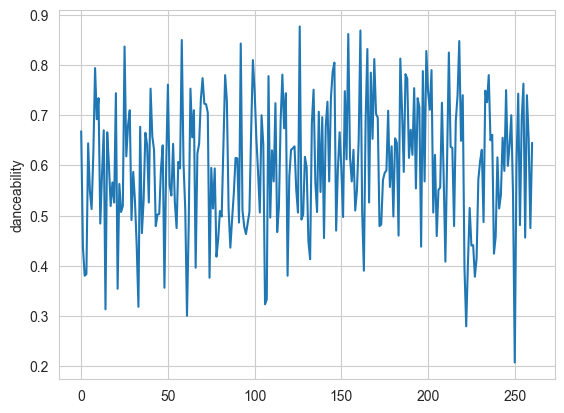

In [105]:
import seaborn as sns
sns.lineplot(x=df_features.index, y='danceability', data=df_features)

<Axes: ylabel='energy'>

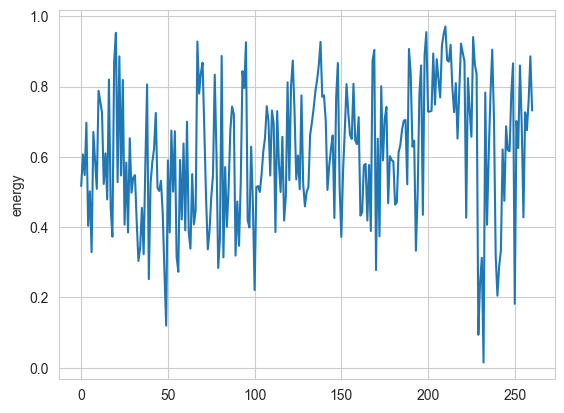

In [106]:
sns.lineplot(x=df_features.index, y='energy', data=df_features)


<Axes: ylabel='valence'>

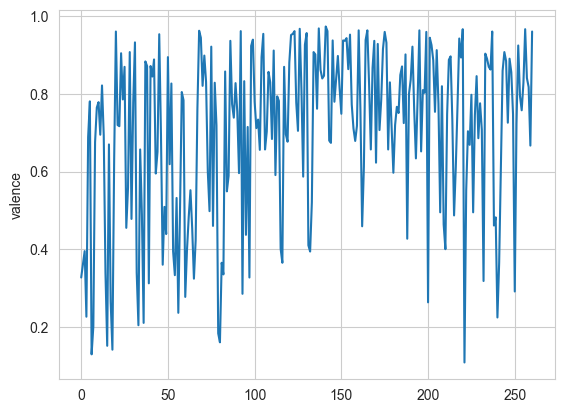

In [108]:
sns.lineplot(x=df_features.index, y='valence', data=df_features)


# Como podemos melhorar a playlist para que haja uma evolução/aumento/desenvolvimento da mesma, a partir de suas métricas como energy, danceability, valence, instrumentalness, etc?

### Algumas funções de ajuda para listagem:


In [36]:
def busca_artista(nome):
    artista = sp.search(q='artist:' + nome, type='artist')['artists']['items'][0]
    return artista

def infos_artista(artist):
    print(f'===={artist["name"]}====')
    print(f'Popularidade: {artist["popularity"]}')
    print(f'Seguidores: {artist["followers"]["total"]}')
    if len(artist['genres']) > 0:
       print(f"Gêneros: {', '.join(artist['genres'])}")
    print(f'ID: {artist["id"]}')

def mostra_musicas(album):
    tracks = []
    results = sp.album_tracks(album['id'])
    tracks.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    for i, track in enumerate(tracks):
        print(f"{i + 1} - {track['name']}")

def mostra_albuns(artist):
    albums = []
    results = sp.artist_albums(artist['id'], album_type='album')
    albums.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])
    print(f'Total de discos: {len(albums)}')
    unique = set()  
    for album in albums:
        name = album['name'].lower()
        if name not in unique:
            print(f'ALBUM: {name} - {album["release_date"]} // {album["id"]}')
            unique.add(name)
            mostra_musicas(album)

In [34]:
jorgeben = busca_artista("Jorge Ben")
infos_artista(jorgeben)

====Jorge Ben Jor====
Popularidade: 61
Seguidores: 901440
Gêneros: bossa nova, manguebeat, mpb, samba, samba-rock, tropicalia
ID: 5JYtpnUKxAzXfHEYpOeeit


In [37]:
mostra_albuns(jorgeben)

Total de discos: 41
ALBUM: a arte de jorge ben jor - 2015-10-30 // 0NdVGJ7e99By4k43k39nUY
1 - A Banda Do Ze Pretinho
2 - Taj Mahal
3 - A Cegonha Me Deixou Em Madureira
4 - Que Maravilha
5 - Filho Maravilha
6 - Caramba! ... Galileu Da Galiléia
7 - Take It Easy My Brother Charles
8 - Menino Jesus De Praga
9 - Paz E Arroz
10 - Por Causa De Você, Menina / Chove Chuva - Ao Vivo
11 - Ponta De Lança Africano (Umbabarauma)
12 - Adelita
13 - País Tropical
14 - Jorge Da Capadócia
15 - Eu Vou Torcer
16 - Conquero
17 - O Comilão
18 - Zazueira - Ao Vivo
19 - Zumbi
20 - Mas, Que Nada!
ALBUM: jorge ben jor - icollection - 2015-08-28 // 3kqTi0mxbXfk9Bh3kx5fhk
1 - Engenho de dentro
2 - W / Brasil (Chama o síndico) - Ao vivo
3 - País tropical / Spiro giro - Ao vivo
4 - Eu sou cruel
5 - Filho maravilha (Fio maravilha)
6 - Alcohol
7 - Cowboy Jorge
8 - A banda do Zé Pretinho - Radio Version
9 - Mama África
10 - Spirogyra Story
11 - Taj Mahal
12 - Princesa
13 - Goleiro
14 - Dzarm - Rádio Version
15 - Mama Á

In [40]:
for musica in sp.album_tracks('3xWp6y0HGsHZlXljNs7VRy')['items']:
    print(musica['uri'], musica['name'])

spotify:track:6U03Orwr5Dxt8jahLnQpYV Mas, Que Nada!
spotify:track:1jCFnbL30NwORyVsiHX6mH Tim Dom Dom
spotify:track:1XjFyPzU5z3zbYJQETYGiZ Balança Pema
spotify:track:75wVq4apQLxpOM6R58lMhy Vem Morena Vem
spotify:track:6mTfOxORhYlpnTvm7VrL6b Chove Chuva
spotify:track:4LtJsC47UoPlp0qp9srYoy É Só Sambar
spotify:track:2qlihQb5QUstwplDDlkZVL Rosa, Menina Rosa
spotify:track:7CEGXqzXZv7gxsyF30J8cz Quero Esquecer Você
spotify:track:5DPHDqGo6BbyvFn0QUJdIR Uala Ualalá
spotify:track:3RbaFpFrnhkZCIbqyPELna A Tamba
spotify:track:5MmxyCSL7xzxyRZBIVWtju Menina Bonita Não Chora
spotify:track:0YojqXjn4xb5hblpFAhqJr Por Causa De Você, Menina


In [41]:
sp.audio_analysis('spotify:track:6U03Orwr5Dxt8jahLnQpYV')

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1572336673,
  'analysis_time': 5.40247,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 3953418,
  'duration': 179.29333,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 0.39465,
  'start_of_fade_out': 169.9062,
  'loudness': -8.645,
  'tempo': 89.499,
  'tempo_confidence': 0.54,
  'time_signature': 4,
  'time_signature_confidence': 1.0,
  'key': 2,
  'key_confidence': 0.675,
  'mode': 0,
  'mode_confidence': 0.573,
  'codestring': 'eJxFmtmV5DgMBF2RCbwP_x3biGT17HzMa1IqkcSRSAA8pde2y21f-W4_rdY29tfP-O65u_V-7jf3-lY7pY67x1dLG99cfd2zyv74Ab_c5-x6Lk957xulzlrvql89c32tjLPGaPVrrZyvztvOLu3j64tlzmmNlb62-PBxPyzGHgrv9lvOHHPPr7dSvlnWGczVr3e2vG-rbGMMN8zT6SK7VzbQ-fzpa67LcYbnWfOeXvn6NzwQJ9jtrn2-sd1G6-3ufnmZ3fHy6fOcwuELJ2ChXvdhQ3P432z3rsvDy-Fb7Xf1iSxWqR6I_a

E se não usássemos o Spotipy, mas conversássemos com a API diretamente?

In [ ]:
import requests

api_token = 'https://accounts.spotify.com/api/token'
params = {'grant_type': 'client_credentials',
          'client_id': os.environ['SPOTIPY_CLIENT_ID'],
          'client_secret': os.environ['SPOTIPY_CLIENT_SECRET']}
header = {'Content-Type': 'application/x-www-form-urlencoded'}

response = requests.post(api_token, data=params, headers=header)
token_acesso = response.json()['access_token']

response = requests.get('https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb',
                        headers={'Authorization': f'Bearer {token_acesso}'})

{
  "external_urls": {
    "spotify": "https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb"
  },
  "followers": {
    "href": null,
    "total": 7625607
  },
  "genres": [
    "alternative rock",
    "art rock",
    "melancholia",
    "oxford indie",
    "permanent wave",
    "rock"
  ],
  "href": "https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb",
  "id": "4Z8W4fKeB5YxbusRsdQVPb",
  "images": [
    {
      "height": 640,
      "url": "https://i.scdn.co/image/ab6761610000e5eba03696716c9ee605006047fd",
      "width": 640
    },
    {
      "height": 320,
      "url": "https://i.scdn.co/image/ab67616100005174a03696716c9ee605006047fd",
      "width": 320
    },
    {
      "height": 160,
      "url": "https://i.scdn.co/image/ab6761610000f178a03696716c9ee605006047fd",
      "width": 160
    }
  ],
  "name": "Radiohead",
  "popularity": 79,
  "type": "artist",
  "uri": "spotify:artist:4Z8W4fKeB5YxbusRsdQVPb"
}